In [7]:
import torch

from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel

In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

In [19]:
#text = 'The black cat sat on the couch and the brown dog slept on the rug.'
text = 'I went to the money bank which is located near the river bank.'

In [20]:
tokens = tokenizer.tokenize(text)
tokens_to_ids = tokenizer.convert_tokens_to_ids(tokens)
tokens_tensor = torch.tensor([tokens_to_ids])
tokens_tensor

tensor([[1045, 2253, 2000, 1996, 2769, 2924, 2029, 2003, 2284, 2379, 1996, 2314,
         2924, 1012]])

In [21]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# embeddings and similarity

# similarity increase per layers

In [22]:
def get_similarities_12_layers():
    similarities = list()

    with torch.no_grad():
        output = model(tokens_tensor)

        # can use the second index which has the embeddings of all layers
        for i in range(1, 13):
            last_hidden_state = output[2][i]
            word_embed_1 = last_hidden_state

            black = word_embed_1[0][5].reshape(1, -1)
            brown = word_embed_1[0][12].reshape(1, -1)

            similarity = cosine_similarity(black, brown)
            similarities.append(similarity[0][0])
            
    return similarities
        

similarities_12_layers = get_similarities_12_layers()
similarities_12_layers

[0.8783004,
 0.8551016,
 0.79436886,
 0.76583827,
 0.75631595,
 0.7268312,
 0.7155777,
 0.7320422,
 0.7191924,
 0.74217415,
 0.8127756,
 0.79448915]

# plot the similarity curve

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

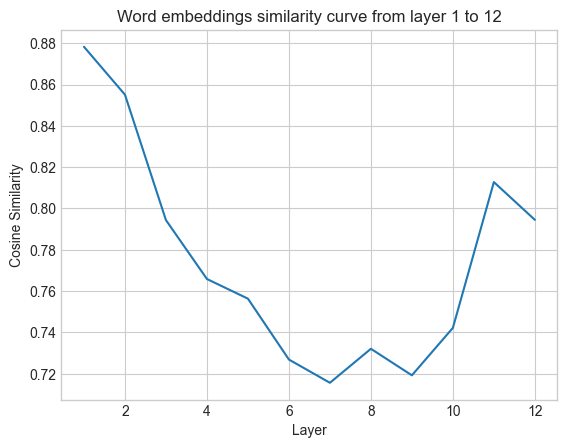

In [24]:
fig = plt.figure()
ax = plt.axes()

plt.plot(range(1, 13), similarities_12_layers, linestyle='solid')
plt.title("Word embeddings similarity curve from layer 1 to 12")
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity");